In [1]:
import graphlab
import random
import math
import numpy
from matplotlib import pyplot as plt
%matplotlib inline

This non-commercial license of GraphLab Create for academic use is assigned to brenamaia12@gmail.com and will expire on March 22, 2019.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1524788557.log


In [2]:
random.seed(98103)
n = 30
x = graphlab.SArray([random.random() for i in range(n)]).sort()

In [3]:
x

dtype: float
Rows: 30
[0.03957894495006575, 0.04156809967912256, 0.0724319480800758, 0.1502890446221763, 0.16133414450223427, 0.19195631279497838, 0.23283391714465285, 0.25990098016580054, 0.3801458148686865, 0.432444723507992, 0.47056698189428126, 0.4714946037956341, 0.47870640066103853, 0.49053553924712967, 0.5467800590828905, 0.5696803579782542, 0.6079324536462045, 0.6202375373443129, 0.630093133764472, 0.6450096693254694, 0.6467576040906915, 0.6990897790220533, 0.7902450464374043, 0.8103846511814395, 0.829320894073608, 0.8501115576007019, 0.8863684369527574, 0.8911410794245727, 0.9043884813966695, 0.9244858666003654]

In [4]:
y = x.apply(lambda x: math.sin(4*x))

In [5]:
y

dtype: float
Rows: 30
[0.15765527330715118, 0.16550731513895361, 0.28569137317201587, 0.5655963310738573, 0.6014673638641537, 0.6945723182799316, 0.8024177336626097, 0.8622036562183355, 0.9987395887969133, 0.9873888679370947, 0.9518836143289069, 0.9507399491702666, 0.9414033048470645, 0.9243965533386744, 0.8160088904398481, 0.759712729130455, 0.6517297472208435, 0.6136242987242347, 0.5820277559882728, 0.5325021703779891, 0.5265711949509843, 0.3384164444332101, -0.019386317630007324, -0.09977963765619023, -0.17478846590569042, -0.25597249131754973, -0.3929901249560022, -0.4104720422761508, -0.4581930879372578, -0.5280908755021222]

In [6]:
random.seed(1)
e = graphlab.SArray([random.gauss(0,1.0/3.0) for i in range(n)])
y = y + e

In [7]:
data = graphlab.SFrame({'X1':x, 'Y':y})

In [8]:
data

X1,Y
0.0395789449501,0.587050191026
0.0415680996791,0.648655851372
0.0724319480801,0.307803309485
0.150289044622,0.310748447417
0.161334144502,0.237409625496
0.191956312795,0.705017157224
0.232833917145,0.461716676992
0.259900980166,0.383260507851
0.380145814869,1.06517691429
0.432444723508,1.03184706949


In [9]:
def polynomial_features(data, deg):
    data_copy=data.copy()
    for i in range(1, deg):
        data_copy['X'+str(i+1)] = data_copy['X' + str(i)]*data_copy['X1']
        return data_copy
    

In [10]:
def regressao_polinomial_cume(data,deg,l2_penalty):
    model = graphlab.linear_regression.create(polynomial_features(data,deg),
                                             target='Y', l2_penalty=l2_penalty,
                                             validation_set=None,verbose=False)
    return model

In [11]:
def print_coefficients(model):
    
    deg = len(model.coefficients['value'])-1
    w = list(model.coefficients['value'])
    
    print 'Coeficientes do polinomio de grau' + str(deg) + ':'
    w.reverse()
    print numpy.poly1d(w)

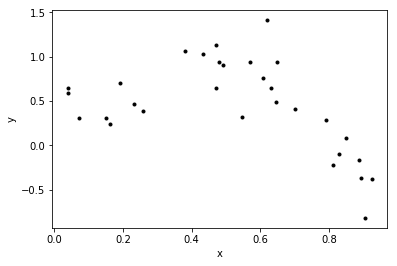

In [12]:
def plot_data(data):
    plt.plot(data['X1'],data['Y'], 'k.')
    plt.xlabel('x')
    plt.ylabel('y')
    
plot_data(data)

In [13]:
def plot_predicoes(data,model):
    plot_data(data)
    deg = len(model.coefficients['value'])-1
    x_pred = graphlab.SFrame({'X1':[i/200.0 for i in range(200)]})
    y_pred = model.predict(polynomial_features(x_pred,deg))
    
    plt.plot(x_pred['X1'], y_pred, 'g-', label='degree' + str(deg) + 'fit')
    plt.legend(loc='upper left')
    plt.axis([0,1,-1.5,2])

In [14]:
model = regressao_polinomial_cume(data, deg=16, l2_penalty=1e-25)
print_coefficients(model)

Coeficientes do polinomio de grau2:
        2
-5.129 x + 4.147 x + 0.07471


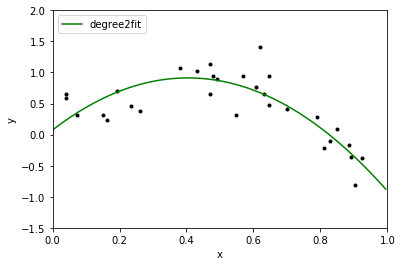

In [15]:
plot_predicoes(data,model)

In [16]:
model = regressao_polinomial_cume(data, deg=16, l2_penalty=100)
print_coefficients(model)

Coeficientes do polinomio de grau2:
         2
-0.1118 x - 0.04438 x + 0.5151


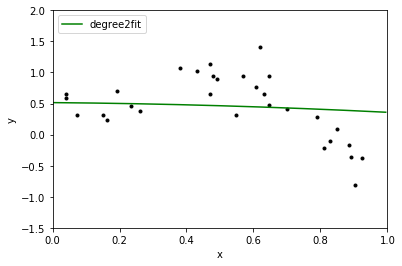

In [17]:
plot_predicoes(data,model)

lambda = 1.00e-25
Coeficientes do polinomio de grau2:
        2
-5.129 x + 4.147 x + 0.07471


lambda = 1.00e-10
Coeficientes do polinomio de grau2:
        2
-5.129 x + 4.147 x + 0.07471


lambda = 1.00e-06
Coeficientes do polinomio de grau2:
        2
-5.129 x + 4.147 x + 0.07471


lambda = 1.00e-03
Coeficientes do polinomio de grau2:
        2
-5.113 x + 4.13 x + 0.07775


lambda = 1.00e+02
Coeficientes do polinomio de grau2:
         2
-0.1118 x - 0.04438 x + 0.5151




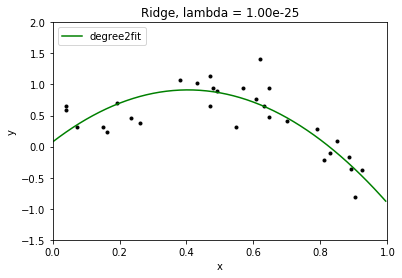

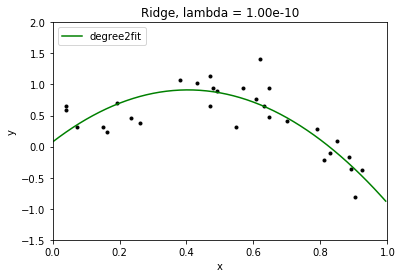

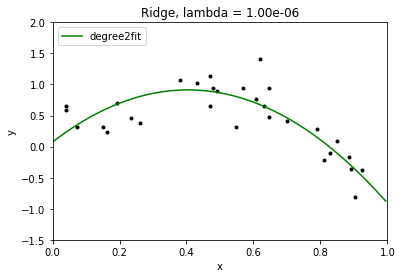

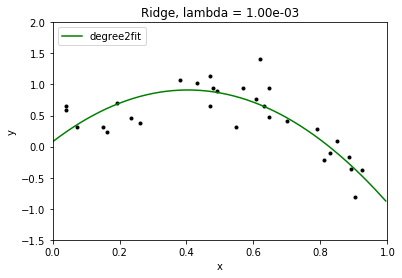

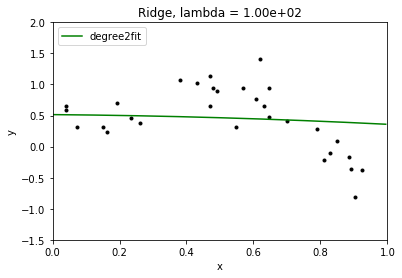

In [18]:
for l2_penalty in [1e-25, 1e-10, 1e-6, 1e-3, 1e2]:
    model = regressao_polinomial_cume(data, deg=16, l2_penalty=l2_penalty)
    print 'lambda = %.2e' % l2_penalty
    print_coefficients(model)
    print '\n'
    plt.figure()
    plot_predicoes(data,model)
    plt.title('Ridge, lambda = %.2e' % l2_penalty)

In [19]:
def loo(data, deg, l2_penalty_values):
    data = polynomial_features(data, deg)
    num_folds = 5
    folds = graphlab.cross_validation.KFold(data, num_folds)
    
    l2_penalty_mse = []
    min_mse = None
    best_l2_penalty = None
    for l2_penalty in l2_penalty_values:
        next_mse = 0.0
        for train_set, validation_set in folds:
            model = graphlab.linear_regression.create(train_set,target='Y',
                                                      l2_penalty=l2_penalty,
                                                      validation_set=None,verbose=False)
            y_test_predicted = model.predict(validation_set)
            next_mse += ((y_test_predicted-validation_set['Y'])**2).sum()

            next_mse = next_mse/num_folds
            l2_penalty_mse.append(next_mse)
            if min_mse is None or next_mse < min_mse:
                min_mse = next_mse
                best_l2_penalty = l2_penalty
        return l2_penalty_mse, best_l2_penalty

In [20]:
l2_penalty_values = numpy.logspace(-4, 10, num=10)

In [21]:
l2_penalty_mse, best_l2_penalty = loo(data, 16, l2_penalty_values)

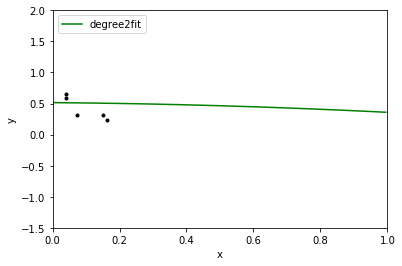

In [31]:
plot_predicoes(data[:5],model)

In [24]:
def loo(data, deg, l2_penalty_values):
    data = polynomial_features(data, deg)
    num_folds = 10
    folds = graphlab.cross_validation.KFold(data, num_folds)
    
    l2_penalty_mse = []
    min_mse = None
    best_l2_penalty = None
    for l2_penalty in l2_penalty_values:
        next_mse = 0.0
        for train_set, validation_set in folds:
            model = graphlab.linear_regression.create(train_set,target='Y',
                                                      l2_penalty=l2_penalty,
                                                      validation_set=None,verbose=False)
            y_test_predicted = model.predict(validation_set)
            next_mse += ((y_test_predicted-validation_set['Y'])**2).sum()

            next_mse = next_mse/num_folds
            l2_penalty_mse.append(next_mse)
            if min_mse is None or next_mse < min_mse:
                min_mse = next_mse
                best_l2_penalty = l2_penalty
        return l2_penalty_mse, best_l2_penalty

In [25]:
l2_penalty_values = numpy.logspace(-4, 10, num=10)

In [29]:
l2_penalty_mse, best_l2_penalty = loo(data, 16, l2_penalty_values)

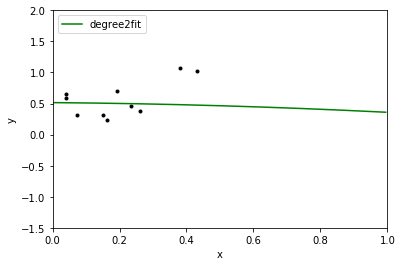

In [32]:
plot_predicoes(data[:10],model)